# Question 1: How are Houses in Kings County Distributed and the effect of Zipcodes on price

**Are some zip codes more densely built up than others?**

Yes, zipcodes directly surrounding Bellevue have higher counts of houses than zip codes further out. 


**Do House Prices vary by Zipcode**

From below, it is clear that the average house price is very different based on the zipcode

**Where are the most expensive houses located**

Houses in the North of the County, notably surrounding bellevue, are the most expensive

With houses in the south of the county being cheaper

In [1]:
import pandas as pd
import json
import folium
from folium.plugins import MarkerCluster # for clustering the markers
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import numpy as np
import MyMaps

In [2]:
df= pd.read_csv('~/flatiron/mod2/dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/csv/datawithnewcols.csv',index_col=0)

In [3]:
df['sqft_living'].value_counts()

1300    125
1440    121
1400    120
1820    118
1660    113
       ... 
1048      1
3273      1
1256      1
3305      1
2153      1
Name: sqft_living, Length: 925, dtype: int64

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,15.150174,12.613856,30.859494
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,14.375822,14.375822,33.112379
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,17.522706,10.617501,10.988905
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,11.683886,11.683886,27.230991
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,-122.005,4760,101930,19,19,True,25.295727,15.508940,15.508940,32.449837


In [5]:
zipcodedf = df.groupby('zipcode')['price'].agg(['mean','count','median'])
zipcodedf.reset_index(inplace = True)

In [6]:
zipcodedf['zipcode'] = zipcodedf['zipcode'].map(lambda x:str(x))
zipcodedf['mean'] = zipcodedf['mean'].astype('int64')

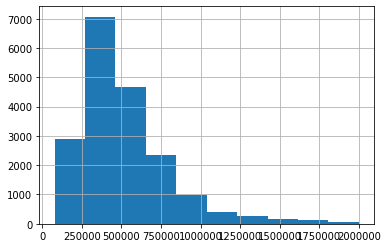

In [7]:
df['price'].hist();

In [8]:
zipcodedf.head()

,zipcode,mean,count,median
0,98001,278733,328,259450.0
1,98002,234927,178,235000.0
2,98003,288682,255,264000.0
3,98004,1175578,250,1050000.0
4,98005,813864,158,772325.0


In [12]:
with open('~\flatiron\mod2\dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/Zip_Codes.geojson','r') as jsonFile:
    data = json.load(jsonFile)

OSError: [Errno 22] Invalid argument: '~\x0clatiron\\mod2\\dsc-mod-2-project-v2-1-onl01-dtsc-ft-041320/Zip_Codes.geojson'

In [ ]:
geozips = []
for i in range(len(data['features'])):
    if data['features'][i]['properties']['ZIPCODE'] in list(zipcodedf['zipcode'].unique()):
        geozips.append(data['features'][i])


In [ ]:
new_json = dict.fromkeys(['type','feature'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

In [ ]:
open("../data/cleaned_geodata.json", "w").write(json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': ')))

In [ ]:
kc_geo = r'../data/cleaned_geodata.json'

In [ ]:
m = folium.Map(location=[47.608013, -122.335167], default_zoom_start=11)

folium.GeoJson(
    kc_geo,
    name='geojson'
).add_to(m)

In [ ]:
m.save(outfile = 'file.html')


# Function to Create Map to show characteristics of Zipcodes

In [ ]:

def create_map_Kc_County(df,col,legend ='Insert legend description'):
    """
    Generates a folium map of Seattle
    :param zipcode_data: zipcode dataset
    :param col: feature to display
    :param legend: Insert description for legend based on feature
    :return: mp
    """ 
    kc_geo = r'../data/cleaned_geodata.json'
    mp = folium.Map(location=[47.608013, -122.335167], default_zoom_start=11)

    folium.Choropleth(geo_data=kc_geo, 
                # my dataset                      
                 data=df, 
                # zip code is here for matching the geojson zipcode, col changes the color of zipcode areas
                 columns=['zipcode', col],
                # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
                 key_on='feature.properties.ZIPCODE', 
                 fill_color='Reds', legend_name=legend,fill_opacity=0.7, line_opacity=0.3).add_to(mp)
   
    mp.save(outfile = '../maps/'+ col + '.html')
    




# Create Map for number of houses per zipcode

In [ ]:
create_map_Kc_County(df=zipcodedf, col='count', legend = "Number of Houses in Zipcode" )

In [ ]:
from IPython.display import Image
Image(filename = '../Images/mapwithcounts.png', width=1000, height=1000)

# Create Map for average house price

In [ ]:
create_map_Kc_County(df=zipcodedf,col='median',legend = "Average Price per home in zipcode")

In [ ]:
Image(filename = '../Images/mapwithprice.png', width=1000, height=1000)

# Creating Map with markers for each house

In [ ]:
mp = folium.Map(location=[47.610378, -122.200676], default_zoom_start=11)

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(mp) # create marker clusters
for i in range(df.shape[0]):
    location = [df['lat'][i],df['long'][i]]
    tooltip = f"House ID: {df['id'][i]}"

    folium.Marker(location=location,tooltip=tooltip).add_to(marker_cluster)

folium.Circle([47.610378, -122.200676],
                    radius=15000
                   ).add_to(mp)

mp.save(outfile = '../maps/my_map.html')

In [ ]:
Image(filename = '../Images/distributionofhouses.png', width=1000, height=1000)

# Plotting Long and lat of each house to see distribution of House Price

In [ ]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='long', y ='lat', data=df,hue='price')

# Removing price outliers

In [ ]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price']

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [ ]:
df.drop(all_indices, axis=0,inplace = True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='long', y ='lat', data=df,hue='price')

**After dropping price outliers we have a better view of the distribution of house prices**

In [ ]:
df.corr()['price']

In [ ]:
df['price'].describe()

# 10 Cheapest Zipcodes by House Price


In [ ]:
ax = df.groupby('zipcode')['price'].median().sort_values(ascending = True)[:10].plot(kind='bar')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# 10 Expensive Zipcodes by House Price

In [ ]:
ax = df.groupby('zipcode')['price'].median().sort_values(ascending = False)[:10].plot(kind='bar')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

the Average house price in the 10 cheapest zipcodes is appoximatey USD 250,000

In the 10 most expensive zipcodes, house prices range from an average of USD 800,000 to USD 1.2m

This clearly shows the disaparity in house prices based on zipcodes, and that the zipcode has an effect on price

In [ ]:
df.groupby('zipcode')['price'].median().sort_values(ascending = False)[:10]

In [ ]:
zip98102 = df.loc[df['zipcode']==98102]

In [ ]:
zip98102['price'].min()

In [ ]:
zip98102['price'].max()

In [ ]:
zip98102['price'].median()

In [ ]:
dftop1000 = df.sort_values(by='price',ascending = False)[:1000]

In [ ]:
mosthousesintop1000 = dftop1000.groupby('zipcode')['price'].count().sort_values(ascending = False)[:5]/1000

In [ ]:
mosthousesintop1000.plot(kind='barh')